No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


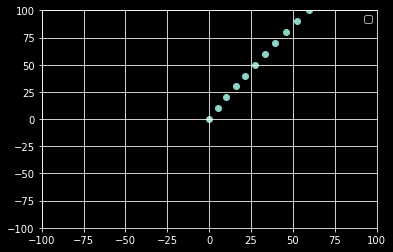

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import time
import math
import matplotlib as mp
import scipy as sp
import pylab as py

from ipynb.fs.full.Neutron_Star_SPH_sph import W, gradW, getPairwiseSeparations, getDensity
from ipynb.fs.full.Neutron_Star_SPH_eos import EOS, initial_n, rho_NS
from ipynb.fs.full.Neutron_Star_SPH_NS import NS, EulerSolver, getPressure,getAcc, plot
from ipynb.fs.full.NS_dynamics import grav_force, leapfrogintegrate


In [ ]:
def get_r(pos1, pos2):
    """ Given two points in 3 dimensions, returns the distance between them 
    and the unit vector pointing between them in x,y,z.
    """
    if len(pos1)==3 and len(pos2)==3:
        d = [pos1[0]-pos2[0], pos1[1]-pos2[1], pos1[2]-pos2[2]]
        dist = np.sqrt(d[0]**2+d[1]**2+d[2]**2) # distance between 
        direc = np.array([d[0] / dist, d[1] / dist, d[2] / dist])
    else:
        print("points are not in 3 dimensions")
        dist = 0
        direc = np.array(0,0,0)
    return dist, direc

# Plotting and positioning the stars

In [ ]:
# Initialization

myEOS = EOS('standard') # create an equation of state object
myNS = NS("my Neutron star 1", myEOS,0.5,0.5) # create a star
myNS2 = NS("my Neutron star 2", myEOS,2,1) # double the mass and radius of the first star

# Mass of each star
m1 = myNS.get_mass() *10**3
m2 = myNS2.get_mass() *10**3

# Initial positions and velocities of the center of mass of each star
pos_obj1 = np.array([0,0,0])
pos_obj2 = np.array([1, 5, 0])
v_obj1 = [0,0,0]
v_obj2 = [0,0,0]

# Update the star's center of masses
myNS.update_motion(pos_obj1)
myNS2.update_motion(pos_obj2)

# Plot the stars' initial positions
#plot([myNS, myNS2])

# 1-D Point Particles Dynamics

In [ ]:
times = np.arange(0.01, 20, 0.1)

plot_limits = 40

# initialize empty position and velocity arrays for storage
vel_arr1 = np.zeros((len(times), 3))
vel_arr2 = np.zeros((len(times), 3))
pos_arr1 = np.zeros((len(times), 3))
pos_arr2 = np.zeros((len(times), 3))

# initialize the initial positions of the stars in the position and velocity arrays
pos_arr1[0] = pos_obj1
pos_arr2[0] = pos_obj2
vel_arr1[0] = v_obj1
vel_arr2[0] = v_obj2

# make the figure
fig, ax = plt.subplots()
ax.set_xlim([-plot_limits,plot_limits]) # set plot limits
ax.set_ylim([-plot_limits,plot_limits])
# plot initial position
plt.scatter(pos_arr1[0][0], pos_arr1[index][1], c='blue', label='obj1')
plt.scatter(pos_arr2[0][0], pos_arr2[index][1], c='red',  label='obj2')

#fig2 = plt.figure(figsize=(4,5), dpi = 300)
#grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3)
#ax2 = plt.subplot(grid[0:2,0])

for index in range(len(times)-1):
    t = times[index] # get the time from times
    
    # get gravitational force between objects at this time
    dist, unitvec = get_r(pos_arr1[index], pos_arr2[index])
    f = grav_force(m1, m2, dist, unitvec)
    
    # calculate the positions and velocities at the next timestep 
    # and store them in the position and velocity arrays
    vel_arr1[index+1] = vel_arr1[index] + t*f/m1
    vel_arr2[index+1] = vel_arr2[index] - t*f/m2
    pos_arr1[index+1] = (0.5*f/m1*t**2) + vel_arr1[index]*t + pos_arr1[index]
    pos_arr2[index+1] = (-0.5*f/m2*t**2) + vel_arr2[index]*t + pos_arr2[index]
    
    # add new position of each particle to the plot
    plt.scatter(pos_arr1[index+1][0], pos_arr1[index+1][1], c='blue')
    plt.scatter(pos_arr2[index+1][0], pos_arr2[index+1][1], c='red')
    #time.sleep(3)

plt.legend()
plt.show()


plt.plot(pos_arr1)
plt.plot(pos_arr2)

# Update SPH Neutron Star Motion

In [ ]:
for index in range(len(pos_arr1)):
    myNS.update_motion([pos_arr1[index][0], pos_arr1[index][1], pos_arr1[index][2]])
    myNS2.update_motion([pos_arr2[index][0], pos_arr2[index][1], pos_arr2[index][2]])
    both = [myNS, myNS2]
    plot(both, 10**7, 10**7)

# Leapfrog Method

In [ ]:
N = 10000
dt = 0.1
x1,x2,y1,y2,z1,z2,vx1,vx2,vy1,vy2,vz1,vz2 = leapfrogintegrate(r10, r20, v10, v20)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(x1, y1, z1)
ax.plot(x2, y2, z2)